# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import numpy as np
from sklearn.utils import shuffle
import tensorflow as tf


# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file='valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

train_counts = np.unique(y_train, return_counts=True)[1]
valid_counts = np.unique(y_validation, return_counts=True)[1]
test_counts = np.unique(y_test, return_counts=True)[1]




---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

Training Set:   34799 samples
Validation Set: 4410 samples
Test Set:       12630 samples
Image Shape: (32, 32, 3)
Number of classes = 43
Largest class:  750
Smalles class:  60


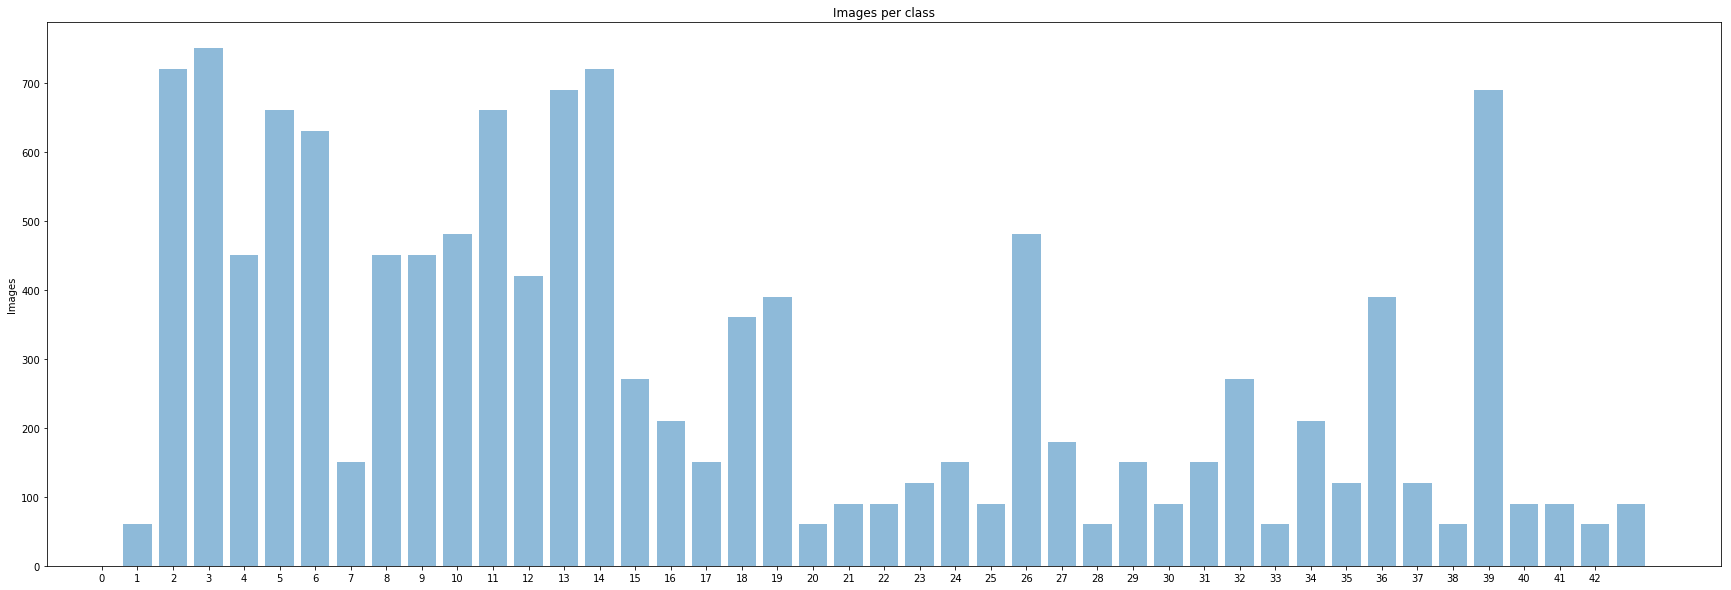

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
print("Training Set:   {} samples".format(len(X_train)))

# TODO: Number of validation examples
print("Validation Set: {} samples".format(len(X_validation)))

# TODO: Number of testing examples.
print("Test Set:       {} samples".format(len(X_test)))

# TODO: What's the shape of an traffic sign image?
print("Image Shape: {}".format(X_train[0].shape))

# TODO: How many unique classes/labels there are in the dataset.
n_classes = pd.Series(y_train)
n_classes = n_classes.unique()
n_classes = n_classes.size
print("Number of classes =", n_classes)

index = np.arange(n_classes)

y_pos = np.arange(len(test_counts))
max_images = max(test_counts)

print("Largest class: ", max(test_counts))
print("Smalles class: ", min(test_counts))


fig, ax = plt.subplots(figsize=(30,10))
plt.bar(index+1, test_counts, align='center', alpha=0.5)
plt.xticks(index)
plt.ylabel('Images')
plt.title('Images per class')
 
plt.show()




### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

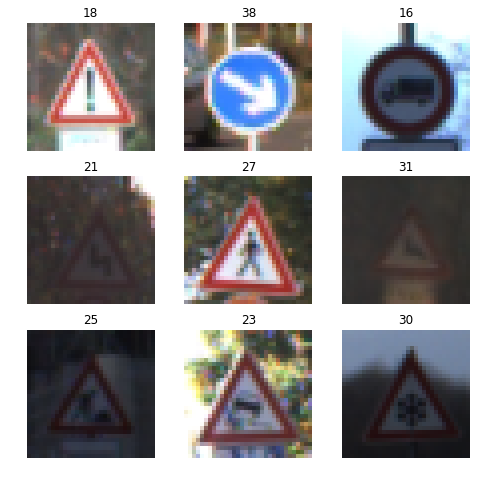

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import numpy as np
from sklearn.utils import shuffle


# Visualizations will be shown in the notebook.
%matplotlib inline

# 9 random training images from distinct classes
fig, axs = plt.subplots(3,3, figsize=(8, 8))
fig.subplots_adjust(hspace = .2, wspace=.2)
axs = axs.ravel()

classes = []

for i in range(9):
    
    #pick random image index
    index = random.randint(0, X_train.shape[0])
    
    #check if class of object was already picked, pick again until new class object
    while y_train[index] in classes:
        index = random.randint(0, X_train.shape[0])
        
    image = X_train[index]
    
    
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(y_train[index])
    classes.append (y_train[index])
    


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

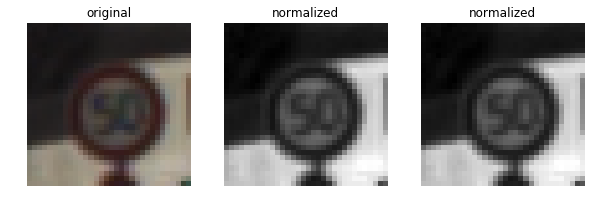

In [4]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

### Preprocess the data here.
### Feel free to use as many code cells as needed.

# Convert to grayscale


from sklearn.utils import shuffle
import cv2

X_train, y_train = shuffle(X_train, y_train)


fig, axs = plt.subplots(1,3, figsize=(10, 3))
axs = axs.ravel()

axs[0].axis('off')
axs[0].set_title('original')
axs[0].imshow(X_train[0].squeeze(), cmap='gray')

# Convert to grayscale
X_train = np.sum(X_train/3, axis=3, keepdims = True)
X_test = np.sum(X_test/3, axis=3, keepdims = True)
X_validation = np.sum(X_validation/3, axis=3, keepdims = True)

axs[1].axis('off')
axs[1].set_title('normalized')
axs[1].imshow(X_train[0].squeeze(), cmap='gray')

X_train = (X_train - 128)/128 
X_test = (X_test - 128)/128
X_validation = (X_validation - 128)/128

axs[2].axis('off')
axs[2].set_title('normalized')
axs[2].imshow(X_train[0].squeeze(), cmap='gray')

### Model Architecture

In [5]:
import tensorflow as tf

EPOCHS = 200
BATCH_SIZE = 32

In [6]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
    

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [7]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))

keep_prob = tf.placeholder(tf.float32) #dropout
one_hot_y = tf.one_hot(y, 43)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [8]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

rate = 0.0004

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


In [9]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5}) #dropout
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples



In [10]:
with tf.Session() as sess:
     
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5}) #dropout
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.731

EPOCH 2 ...
Validation Accuracy = 0.839

EPOCH 3 ...
Validation Accuracy = 0.852

EPOCH 4 ...
Validation Accuracy = 0.881

EPOCH 5 ...
Validation Accuracy = 0.890

EPOCH 6 ...
Validation Accuracy = 0.894

EPOCH 7 ...
Validation Accuracy = 0.903

EPOCH 8 ...
Validation Accuracy = 0.893

EPOCH 9 ...
Validation Accuracy = 0.895

EPOCH 10 ...
Validation Accuracy = 0.908

EPOCH 11 ...
Validation Accuracy = 0.911

EPOCH 12 ...
Validation Accuracy = 0.906

EPOCH 13 ...
Validation Accuracy = 0.922

EPOCH 14 ...
Validation Accuracy = 0.914

EPOCH 15 ...
Validation Accuracy = 0.902

EPOCH 16 ...
Validation Accuracy = 0.905

EPOCH 17 ...
Validation Accuracy = 0.922

EPOCH 18 ...
Validation Accuracy = 0.927

EPOCH 19 ...
Validation Accuracy = 0.922

EPOCH 20 ...
Validation Accuracy = 0.930

EPOCH 21 ...
Validation Accuracy = 0.915

EPOCH 22 ...
Validation Accuracy = 0.923

EPOCH 23 ...
Validation Accuracy = 0.924

EPOCH 24 ...
Validation Accura

In [11]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver2 = tf.train.import_meta_graph('./lenet.meta')
    saver2.restore(sess, "./lenet")
    test_accuracy = evaluate(X_test, y_test)
    print("Test Set Accuracy = {:.3f}".format(test_accuracy))

Test Set Accuracy = 0.933


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

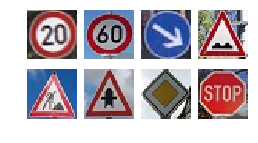

In [12]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

#reading in an image
import glob

fig, axs = plt.subplots(2,4, figsize=(4, 2))
fig.subplots_adjust(hspace = .2, wspace=.1)
axs = axs.ravel()

my_images = []

for i, img in enumerate(glob.glob('./Traffic Signs/*.jpg')):
    image = mpimg.imread(img)
    axs[i].axis('off')
    axs[i].imshow(image)
    my_images.append(image)

    


### Predict the Sign Type for Each Image

In [13]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

my_images = np.asarray(my_images)

my_images = np.sum(my_images/3, axis=3, keepdims=True)

my_images = (my_images - 128)/128 

my_labels = [0, 3, 38, 22, 25, 11, 12, 14]

top_pred = tf.argmax(logits, 1)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver3 = tf.train.import_meta_graph('./lenet.meta')
    saver3.restore(sess, "./lenet")
    
        
    my_top_pred = sess.run(top_pred, feed_dict={x: my_images, keep_prob: 1})    
    
    
    accuracy = evaluate(my_images, my_labels)

    



### Analyze Performance

In [14]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

print ('True Labels')
print (my_labels)
print ('')
print ('Predicted Labels')
print (my_top_pred)
print ('')

print("Accuracy")
print(accuracy)
        

True Labels
[0, 3, 38, 22, 25, 11, 12, 14]

Predicted Labels
[ 0  3 38 22 25 11 12 14]

Accuracy
1.0


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [15]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    softmax = tf.nn.softmax(logits)
    topk_softmax = tf.nn.top_k(softmax, k=5)
    
    topk_softmax_result = sess.run(topk_softmax, feed_dict={x: my_images, keep_prob: 1.0})

    for i in range(len(my_labels)):
        print("Truth for image {0}: {1}. Top 5 predictions: {2}".format(i, my_labels[i], topk_softmax_result[1][i]))

Truth for image 0: 0. Top 5 predictions: [ 0  4  1  8 13]
Truth for image 1: 3. Top 5 predictions: [ 3  2 10  5 31]
Truth for image 2: 38. Top 5 predictions: [38  0  1  2  3]
Truth for image 3: 22. Top 5 predictions: [22 29 25 20  0]
Truth for image 4: 25. Top 5 predictions: [25 20 24 38 11]
Truth for image 5: 11. Top 5 predictions: [11  0  1  2  3]
Truth for image 6: 12. Top 5 predictions: [12  9 40 41 17]
Truth for image 7: 14. Top 5 predictions: [14 25 38 36  5]


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.